# 1. 통계 문제

### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요
- 예시결과

### 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")
'''
t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from scipy import stats as stats

<Axes: ylabel='Count'>

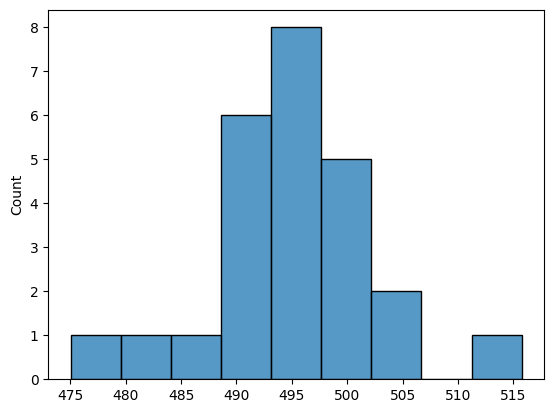

In [ ]:
normal_bread = stats.norm.rvs(loc=495, scale=10, size = 25)

sns.histplot(normal_bread)

In [ ]:

bread_mean = 495
mu = 500
bread_std = 10
root_n = np.sqrt(25)

df = 24

t_statistic = (bread_mean - mu) / (bread_std / root_n)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))
alpha = 0.05


if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


In [ ]:
t_critical = stats.t.ppf(1 - alpha/2, df)

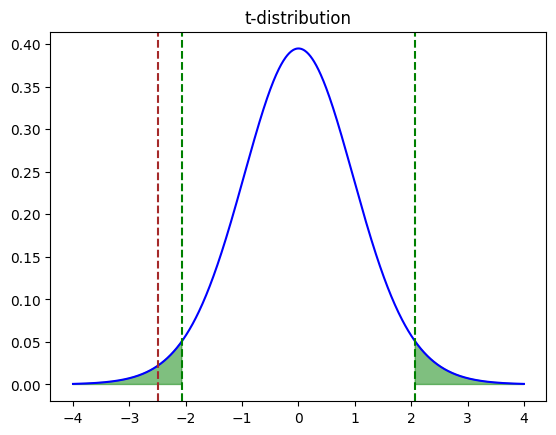

In [ ]:
# 히스토그램 그리기
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, 24)
plt.plot(x, y, 'b-', label="PDF")

plt.fill_between(x, 0, y, where=(x <= -t_critical) | (x >= t_critical), color='green', alpha=0.5)
plt.axvline(-t_critical, color='green', linestyle='--')
plt.axvline(t_critical, color='green', linestyle='--')
plt.axvline(t_statistic, color='brown', linestyle='--')
plt.title("t-distribution")

plt.show()


### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

<aside>
💡

수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 **향상에 효과가 있는지** 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

</aside>

In [ ]:
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터




In [ ]:
mu = np.mean(sample_scores)  # 모집단 평균
alpha = 0.05


t_stat, p_value = stats.ttest_1samp(sample_scores, 75,alternative= 'greater')



In [ ]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")


t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.


### Levene 검정은 모든 입력 샘플이 동일한 분산을 가진 모집단에서 추출되었다는 귀무 가설을 검증합니다.

In [ ]:
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

stat_levene, p_levene = stats.levene(group_A, group_B)
equal_var = p_levene >= 0.05

t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정

<aside>
💡

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.

</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [ ]:
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

alpha = 0.05

t_stat, p_value = stats.ttest_rel(before, after)

# 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.
# 서로 다른 두 집단이 비교하기 적절한 가를 구분하기 위해 등분산 검정을 하기 때문에
# 애초에 같은 집단이자만 특정 요인이 끼치는 차이를 확인하려는 대응표본에서는 불필요하다.



# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")




t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.
- 데이터 불러오는 코드 & 예상결과   
'''     
Sample size: 30, Mean TotalPrice: 11.45     
Sample size: 100, Mean TotalPrice: 25.33    
Sample size: 300, Mean TotalPrice: 19.49    
'''


In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

Path to dataset files: /kaggle/input/online-retail-ii-uci


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [ ]:
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

In [ ]:
sample_sizes  = [30, 100, 300]

In [ ]:
for size in sample_sizes:
    sample = retail.sample(n=size)
    mean_total_price = sample['TotalPrice'].mean()
    print(f"Sample size: {size}, Mean TotalPrice: {mean_total_price:.2f}")

Sample size: 30, Mean TotalPrice: 19.09
Sample size: 100, Mean TotalPrice: 20.51
Sample size: 300, Mean TotalPrice: 16.33


### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [ ]:
import scipy.stats as stats

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = retail['TotalPrice'].sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 24.19, 95% CI: (np.float64(9.141966810966027), np.float64(39.232033189033984))
Sample size: 100, Mean: 22.45, 95% CI: (np.float64(13.103496650409372), np.float64(31.806503349590624))
Sample size: 300, Mean: 20.22, 95% CI: (np.float64(13.640928169492387), np.float64(26.803738497174283))


### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [ ]:


retail_uk = retail[retail['Country'] == 'United Kingdom']
retail_ge = retail[retail['Country'] == 'Germany']





In [ ]:
retail_ge.isna().sum()


,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0
TotalPrice,0


In [ ]:
t_stat, p_value = stats.ttest_ind(retail_uk['TotalPrice'], retail_ge['TotalPrice'], equal_var=True)

In [ ]:
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


# 2. A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.

|  | **노출 수** | **구매 수** |
| --- | --- | --- |
| **페이지 A** | 1000 | 80 |
| **페이지 B** | 200 | 22 |

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요


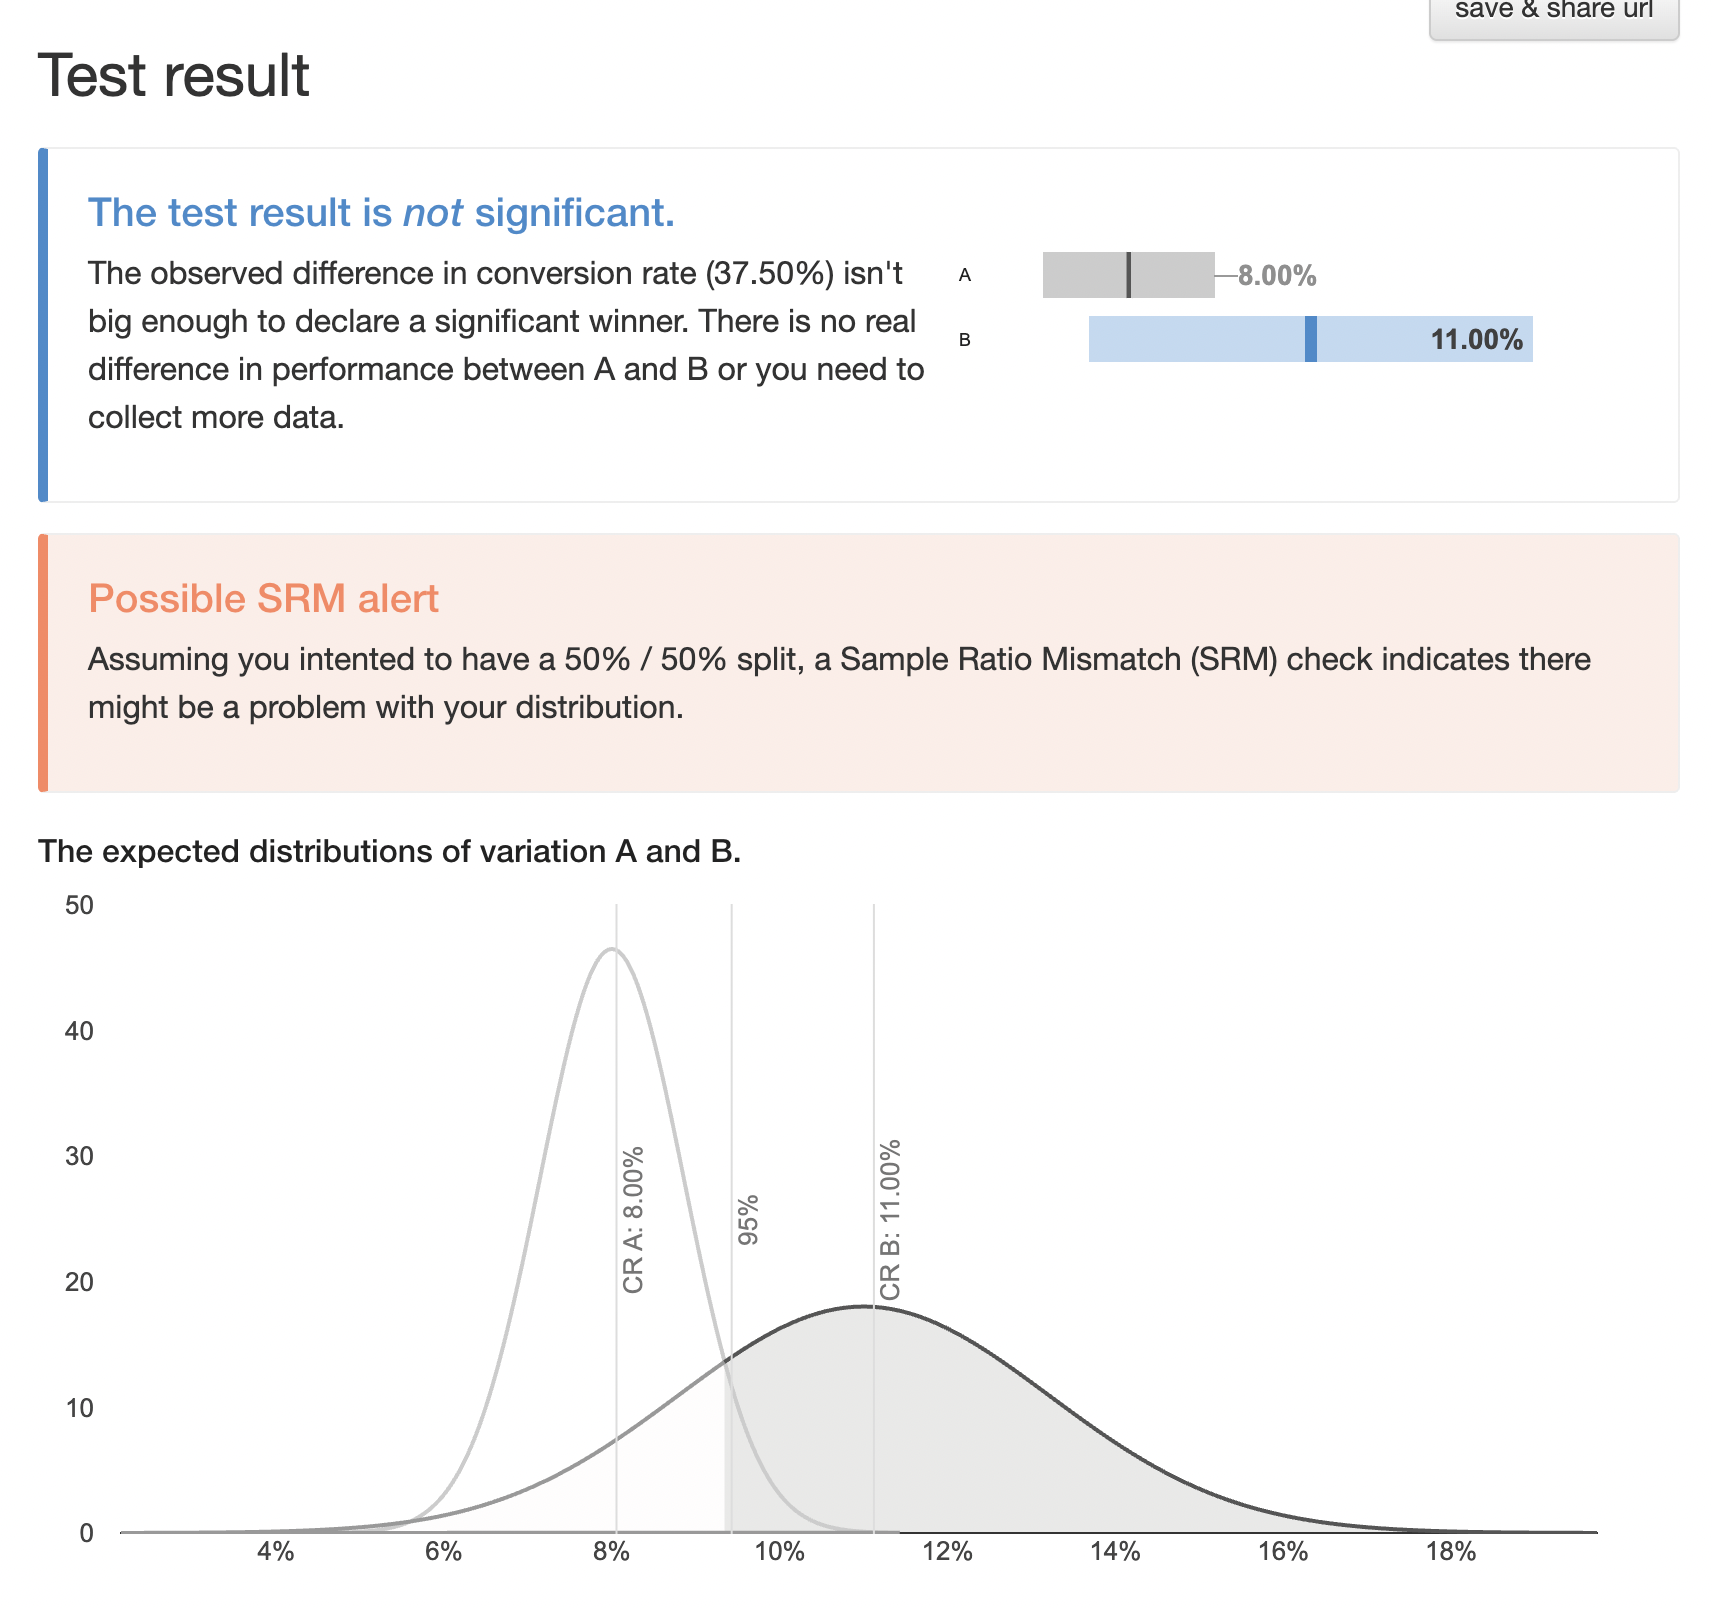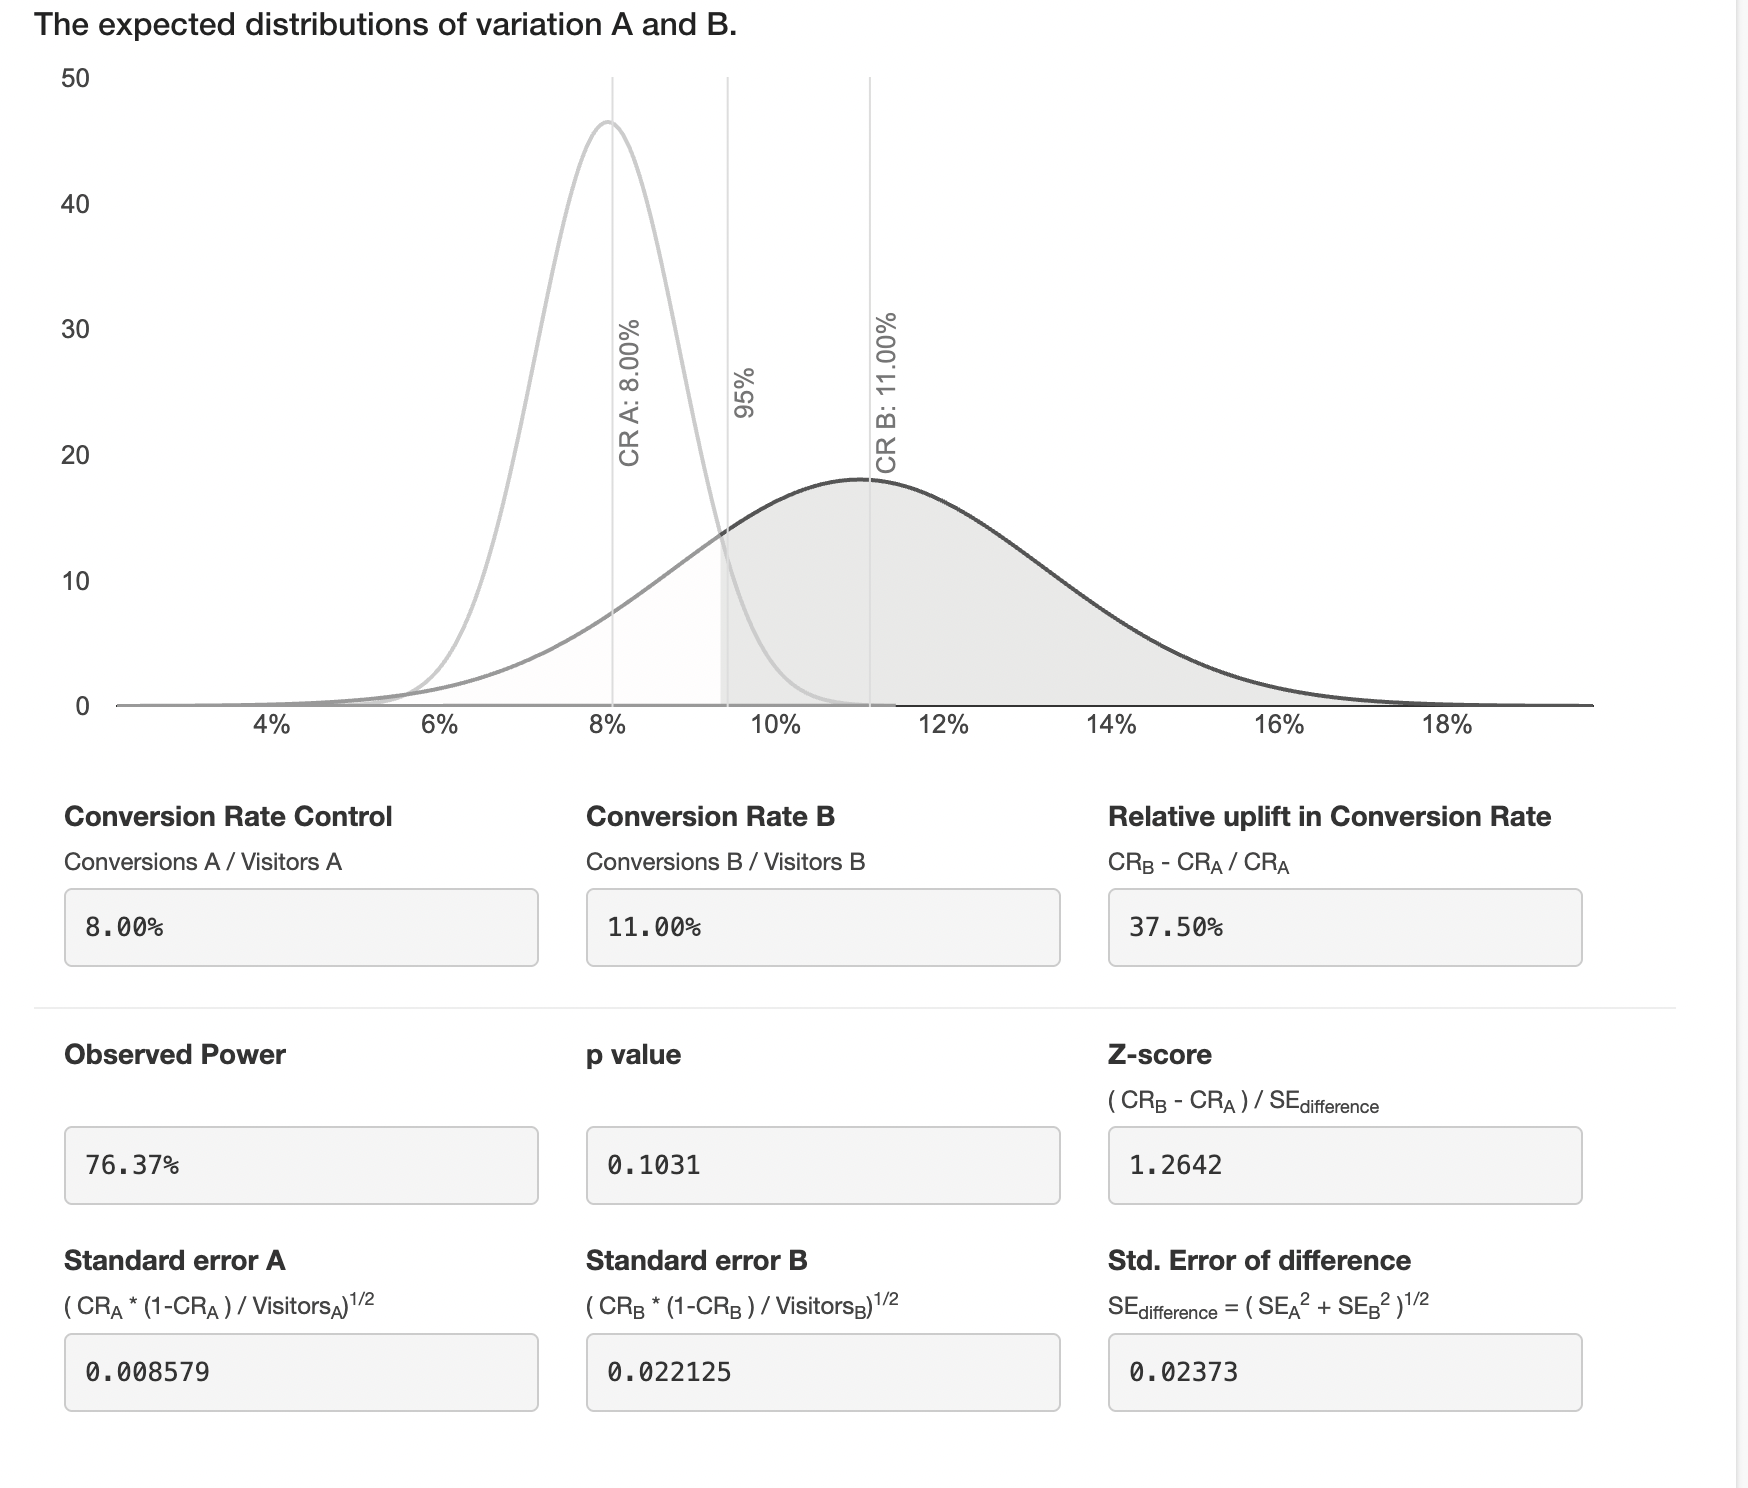

## 9번 문제 서술

귀무가설 : A와 B는 차이가 없다.     
대립가설 : A와 B는 차이가 있다.



p-value가 0.1031 유의수준 0.05보다 높아 통계적으로 유의미하지 않다.


하지만 A(기존페이지)보다 B(신규페이지)의 전환율 8퍼에서 11퍼로 올라가 B가 A에 비해 전환율이 37.5% 더 높다. 또 샘플 비율이 크게 불일치하는 현상이 있다고 ABtest 가이드가 경고하고 있다. B의 전환률이 1000까지 변함이 없다고 가정하다면 p-value가 0.0110로 유의미하다고 판단할 수 있다.



    
그러므로 귀무가설의 기각 채택 판단을 보류하고 B의 샘플의 데이터를 더 모아야 할 것 같다.  

## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요


https://yozm.wishket.com/magazine/detail/1680/







## 10번 문제 서술



---

표본이 크면 쉽게 유의미하고 (25,255의 표본 1%만 차이나도 통계적으로 유의미)    
표본이 작으면 효과가 크게 차이나야 유의미하다. ( 1,030의 표본은 차이가 5%는 나야한다.)    

효과가 미비하더라도 표본이 크고 **전환율당 수익**이 크다면 작은 차이로도 큰 매출을 기대할 수 있다.    
[고객이 100,000명이라면 전환율의 차이가 1%만 되어도 차이는 1,000명이다. 거기에 만약 이들의 평균 객단가가 100만 원이라면 1%라는 작은 차이로도 매출액의 차이는 10억 원에 달한다]    

또 효과가 크더라도 표본이 작고 전환율당 수익이 크지 않다면 수익을 기대하기 힘들 수 도 있다.
[고객이 1,000이라면 5%가 되더라도 50명밖에 되지 않는다. 거기에 만약 평균 객단가가 만 원이라면, 5%라는 차이는 고작해야 50만 원밖에 되지 않는다. 실험을 설계 및 준비하고, 세팅하고, 기다리고, 결과를 해석하는 인건비도 나오지 않을지도 모른다.]
     

예상 전환율 차이 × 예상 고객 수 × 전환당 수익 = 기대 수익이라는 관점에서,    
사업적 의미가 있는 수준의 기대 수익을 창출를 고려하기 때문에     
효과의 차이가 매우 작더라도 기대 수익이 얼마인지 예측하면서 의사결정을 해야 한다.
    
